In [2]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---

We will look at foreclosed property data from Los Angeles and surrounding areas in 2014.
We will need the following fields:
* Property Type, which specifies the kind of house that was foreclosed
* Property Location, which is an address with Latitude and Longitude
* Zip Code
* Lender, which names the bank (or other company) that foreclosed on the property
* Lender Contact, which is the name of a person working in that bank
* Property Management, which is the name of a company that "manages" the property being foreclosed.

---

### [Q1 7 points] Read in the file "2014_Registered_Foreclosure_Properties.csv" and print the first line.

In [21]:
df = pd.read_csv('2014_Registered_Foreclosure_Properties.csv', dtype=str)
df[:1]

,APN,Registered Date,Property Type,Property Location,Zip Code,Council District,Lender,Lender Contact,Lender Contact Phone,Property Management,Property Management Contact,Property Management Address,Property Contact Phone
0,4239001009,01/07/2014,Multi-Family,"709 S 5TH AVE\nLos Angeles, CA 90291\n(33.9954...",90291,11,DCB UNITED LLC,DENNIS ANGEL,818-881-0311,NaN,NaN,NaN,NaN


### [Q2 9 points] How many foreclosed properties are there in the Zip Code 90210?

In [13]:
temp = df[df['Zip Code'] == '90210']
len(temp)

37

### [Q3 9 points] Print out the number of foreclosed properties for all "Property Types"

In [16]:
temp2 = df['Property Type'].value_counts()
temp2

Single Family         6272
Multi-Family          1254
Non-Residential         56
Vacant Residential      17
Name: Property Type, dtype: int64

### [Q4 9 points] For how many properties is the Property Management *not* missing?

In [20]:
temp3 = df.dropna(subset = ['Property Management'])
len(temp3)

7410

### [Q5 9 points] Plot the top 10 Lenders.
The x-axis should be the name of the Lender, and the y-axis should be the number of foreclosed properties.

<AxesSubplot:>

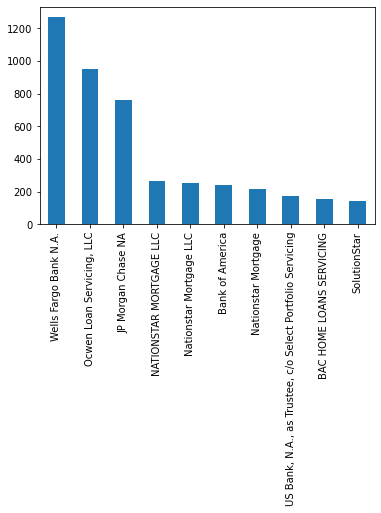

In [22]:
temp4 = df['Lender'].value_counts()[:10]
temp4.plot(kind = 'bar')

### [Q6 9 points] For how many properties is the Property Management identical to the Lender?

In [23]:
temp5 = df[df['Property Management'] == df['Lender']]
len(temp5)

30

### [Q7 11 points] Plot the top-10 Zip Codes for Multi-Family Property Types.
Select only the properties where the Property Type is Multi-Family. Among these, find the top 10 Zip Codes. Plot the Zip Code on the x-axis and the number of Multi-Family properties on the y-axis.

<AxesSubplot:>

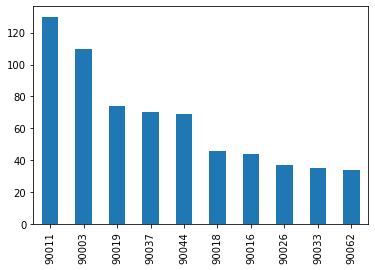

In [24]:
temp6 = df[df['Property Type'] == 'Multi-Family']
temp6['Zip Code'].value_counts()[:10].plot(kind = 'bar')

### [Q8 11 points] How many properties do *not* have "Los Angeles" somewhere in their Property Location?
You need not search for "los angeles" or other upper/lower-case combinations. Just "Los Angeles".

In [27]:
temp7 = df[~df['Property Location'].str.contains('Los Angeles')] #the ~ character is used for a 'not' identifier for the function
len(temp7)

599

### [Q9 13 points] Find all Lenders who have more than 5 Lender Contacts associated with them.

In [41]:
temp8 = df[['Lender','Lender Contact']].drop_duplicates()['Lender'].value_counts()
temp8[temp8>5]

Fannie Mae                                            14
Bank of America c/o Select Portfolio Servicing         6
JPMorgan Chase Bank C/o Select Portfolio Servicing     6
Name: Lender, dtype: int64

### [Q10 13 points] Among Lenders who have at least 10 foreclosed properties, find those who only have properties of a single Property Type.

For example:
* if *ABC Bank* has 10 properties, and they are all Single-Family, then *ABC Bank* passes the check
* if *DEF Bank* has 12 properties, where 10 are Single-Family and 2 are Multi-Family, then it does *not* pass the check
* if *JKL Bank* has 3 properties only, it does not pass.
Print out all the banks that pass the check.

In [47]:
temp9 = df[df['Lender'].map(df['Lender'].value_counts() >=10)]
temp9 = temp9[['Lender', 'Property Type']].drop_duplicates()['Lender'].value_counts()
temp9[temp9 == 1]

U.S. Bank, National Association C/O Select Portfolio Servicing         1
Wells Fargo Bank C/O Select Portfolio Servicing                        1
The Bank of New York Mellon C/O Select Portfolio Servicing             1
HSBC MORTGAGE CORPORATION                                              1
Deutsche Bank National Trust Company C/O Select Portfolio Servicing    1
Union Bank                                                             1
U.S. Bank National Association C/O Select Portfolio Servicing          1
Name: Lender, dtype: int64